In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import main data
data_lcparam = pd.read_csv("lcparam_DS17f.txt", sep=" ")
# import systematic error
data_sys = pd.read_csv("sys_DS17f.txt", sep=" ")
data_sys.columns = ["sys_error"]
sys_error_data = np.reshape(pd.Series.to_numpy(data_sys.sys_error), (40, 40))

from core_mcmc_functions import chain

In [34]:
from prior_likelihood import likelihood

def sys_error_likelihood(params, data):
    return likelihood(params, data, sys_error=sys_error_data)

In [59]:
chn, rej = chain(data_lcparam, 3000, 1000, .001, start_state=[.5, .5, 75, -19.23], variances=[.03, .03, 0, 0], prior_mode='uniform' )
#chn, rej = chain(data_lcparam, 1000, 200, .01, start_state=[.5, .7, 65, -20], variances=[.01, .01, .25, .1], prior_mode='M prior', likelihood_func= sys_error_likelihood )

total trials:3000. accepted 41.5% of trials
convergence failed. converged parameters: [False False  True  True]


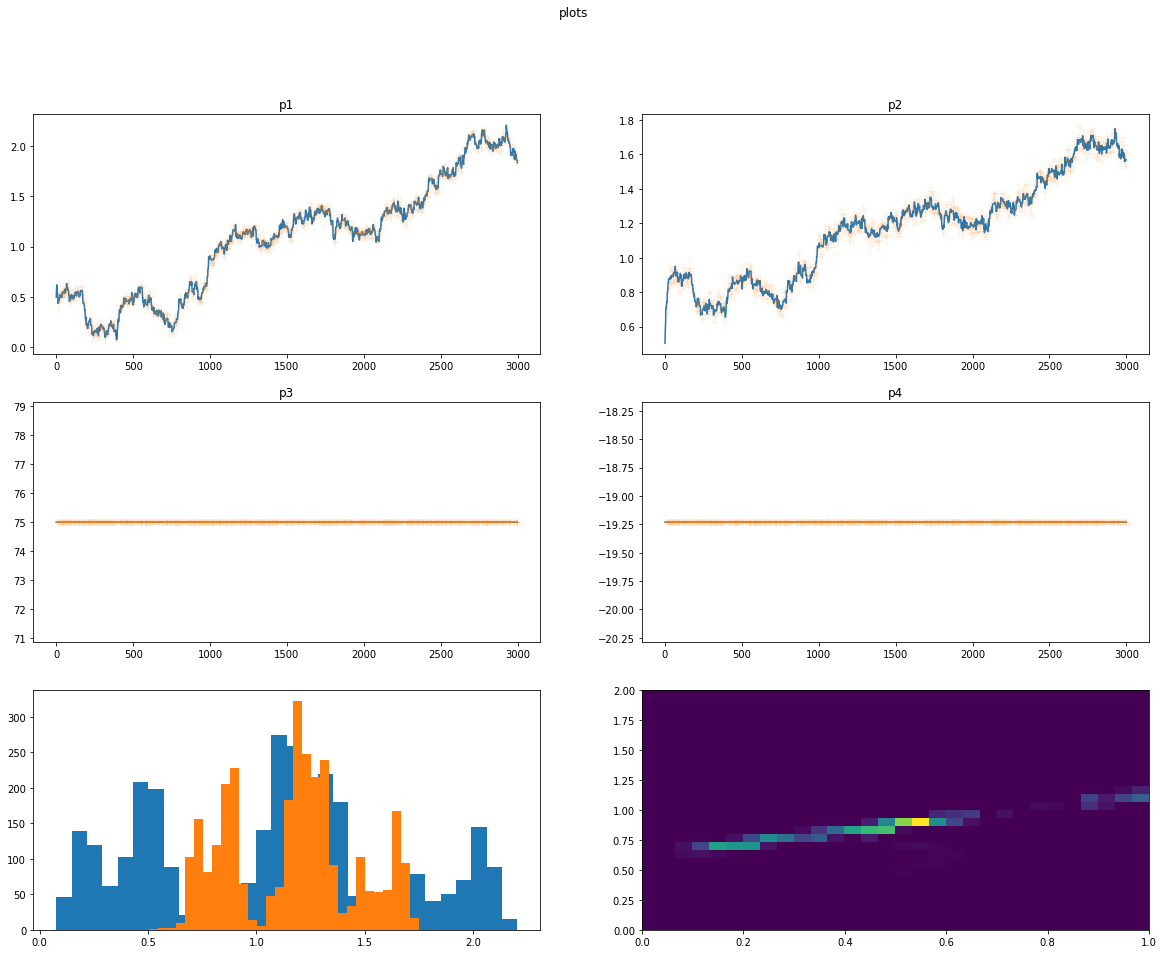

In [60]:
fig,ax = plt.subplots(3,2, figsize=(20,15))
fig.suptitle('plots')
rej_a =.08
ax[0,0].plot(chn[:,0])
ax[0,0].plot(rej[:,0], '+', alpha=rej_a)
ax[0,0].set_title('p1')
ax[0,1].plot(chn[:,1])
ax[0,1].plot(rej[:,1], '+', alpha=rej_a)
ax[0,1].set_title('p2')
ax[1,0].plot(chn[:,2])
ax[1,0].plot(rej[:,2], '+', alpha=rej_a)
ax[1,0].set_title('p3')
ax[1,1].plot(chn[:,3])
ax[1,1].plot(rej[:,3], '+', alpha=rej_a)
ax[1,1].set_title('p4')
ax[2,0].hist(chn[:,0],bins=30);
ax[2,0].hist(chn[:,1], bins=30);
ax[2,1].hist2d(chn[:,0],chn[:,1], bins=30, range=[[0, 1], [0, 2]]);

In [54]:
def likelihood_test(resolution, p_min, p_max, p1_slice=.25, p2_slice=.75, p1=True):
    p= np.linspace(p_min,p_max,resolution)
    p_array=np.zeros(resolution)
    if p1:
        for i, p1_item in enumerate(p):
             p_array[i]= likelihood([p1_item,p2_slice,75,-19.23], data_lcparam)
    else:
        for j,p2_item in enumerate(p):
            p_array[j] = likelihood([p1_slice,p2_item,75,-19.23], data_lcparam)
    
    plt.plot(p,p_array)


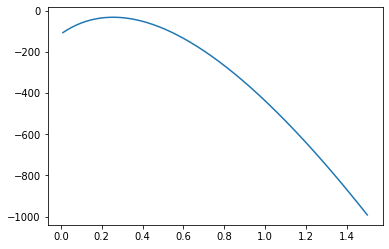

In [53]:
likelihood_test(200,.01,1.5)
